# Temoa Simulation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_parser import get_output_files, make_capacity_plots, make_emissions_plots
from data_parser import get_scenario_name, parse_datalines, create_dataframe, create_column
from data_parser import data_by_tech, data_by_variable, data_by_year
from data_parser import variables, time_horizon, get_total

## Business As Usual

* Nuclear reactors shutdown at the end of their current licenses.
* There is no constraint on carbon or other greenhouse gas emissions.

In [2]:
file_list = get_output_files()
file_list.sort()
file_list

['./data_files/BAU2_IL_bau2_model/bau2_OutputLog.log',
 './data_files/BAU_IL_bau_model/bau_OutputLog.log',
 './data_files/SD2_IL_SD2_model/SD2_OutputLog.log',
 './data_files/SD3_IL_SD3_model/SD3_OutputLog.log',
 './data_files/SD4_IL_SD4_model/SD4_OutputLog.log']

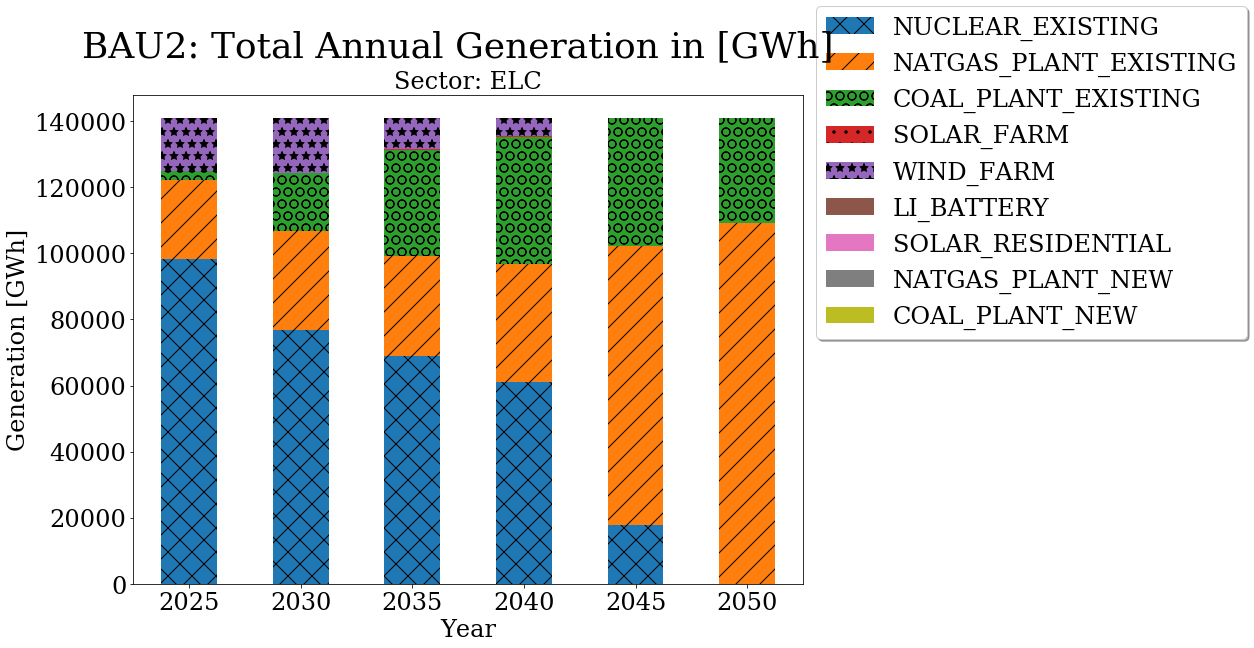

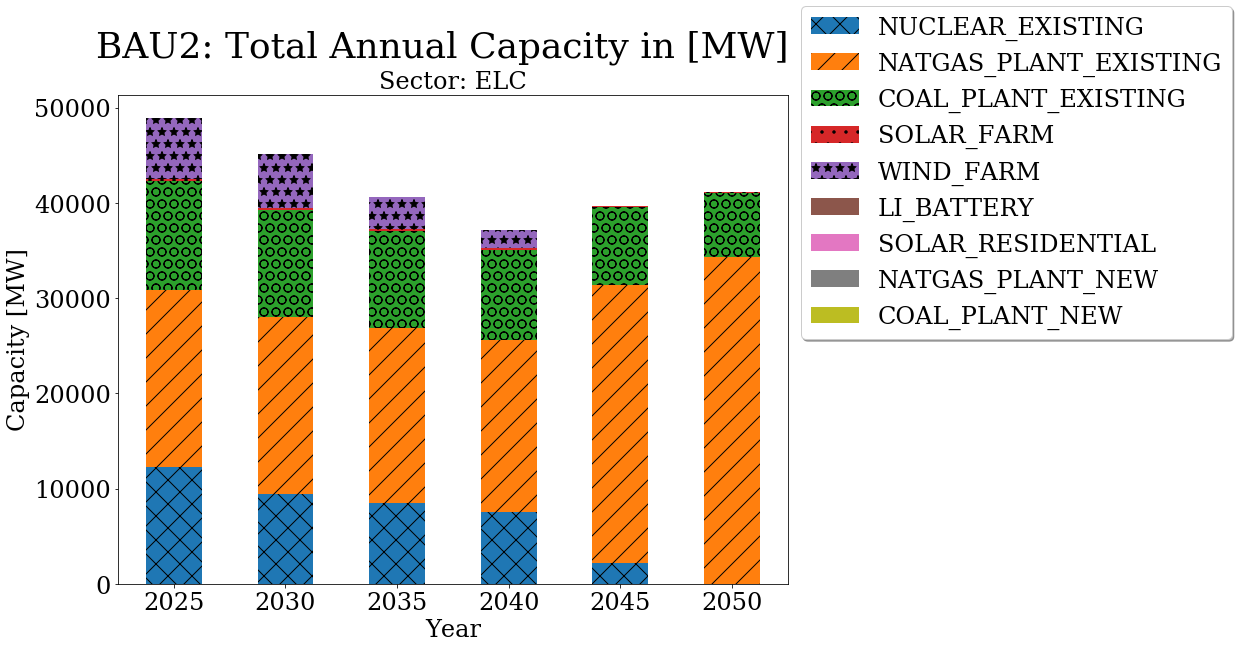

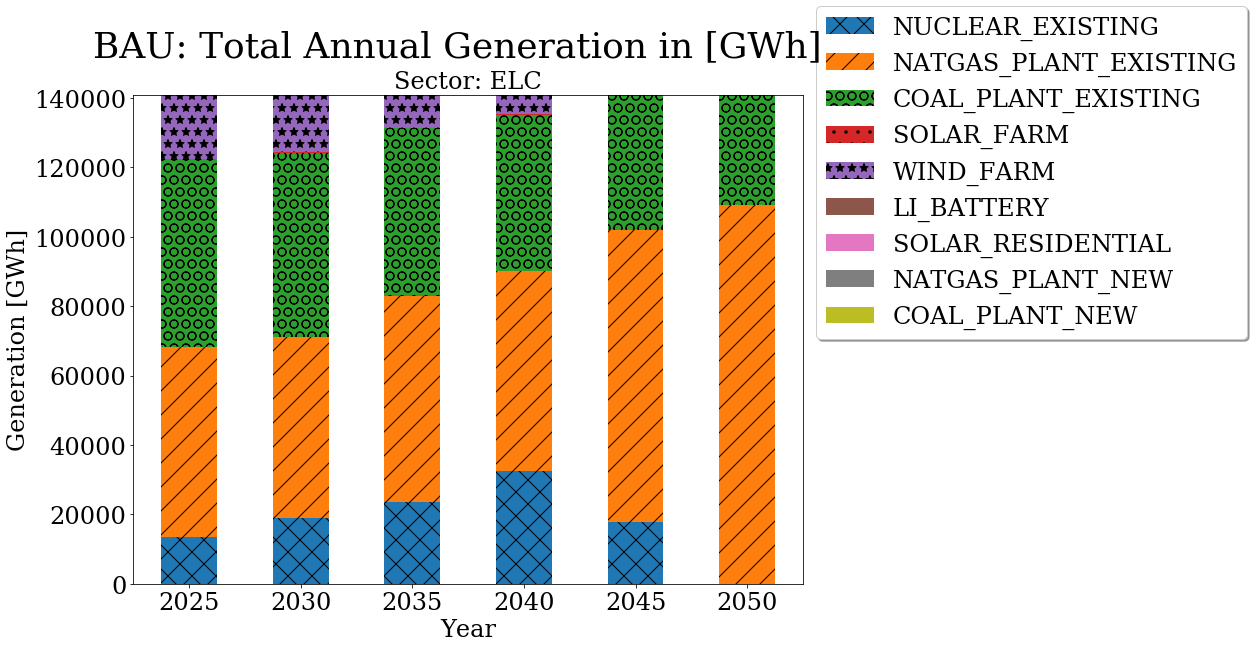

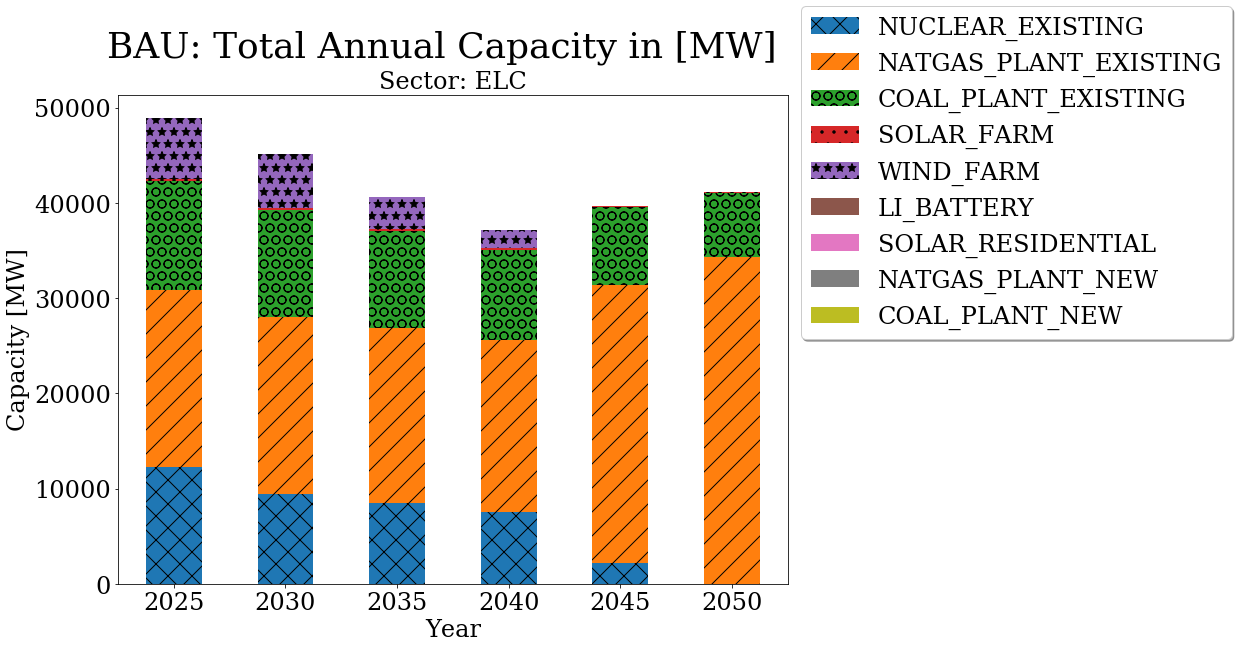

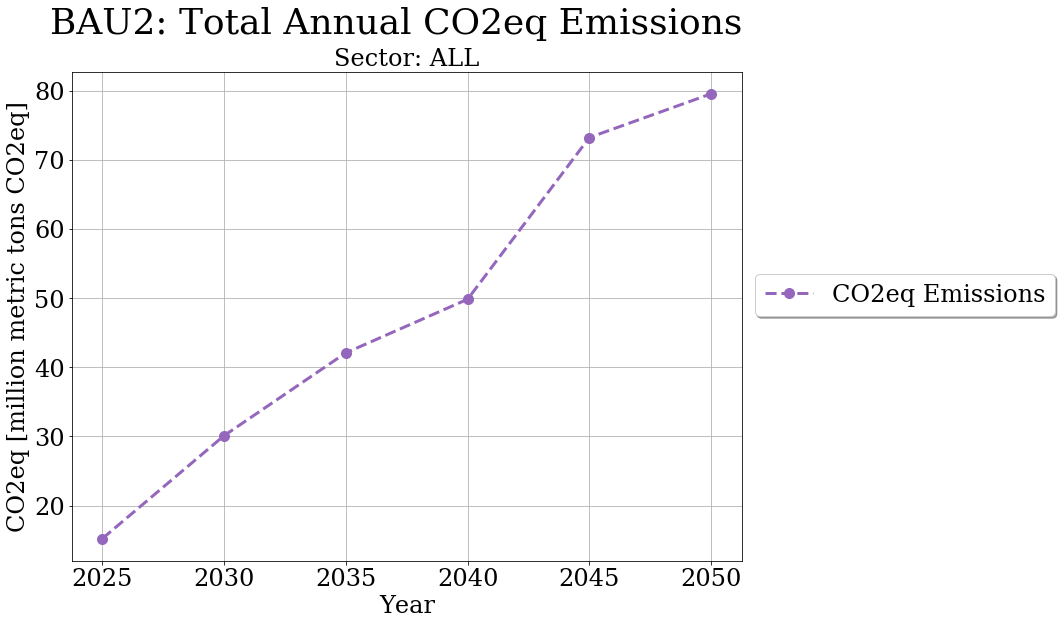

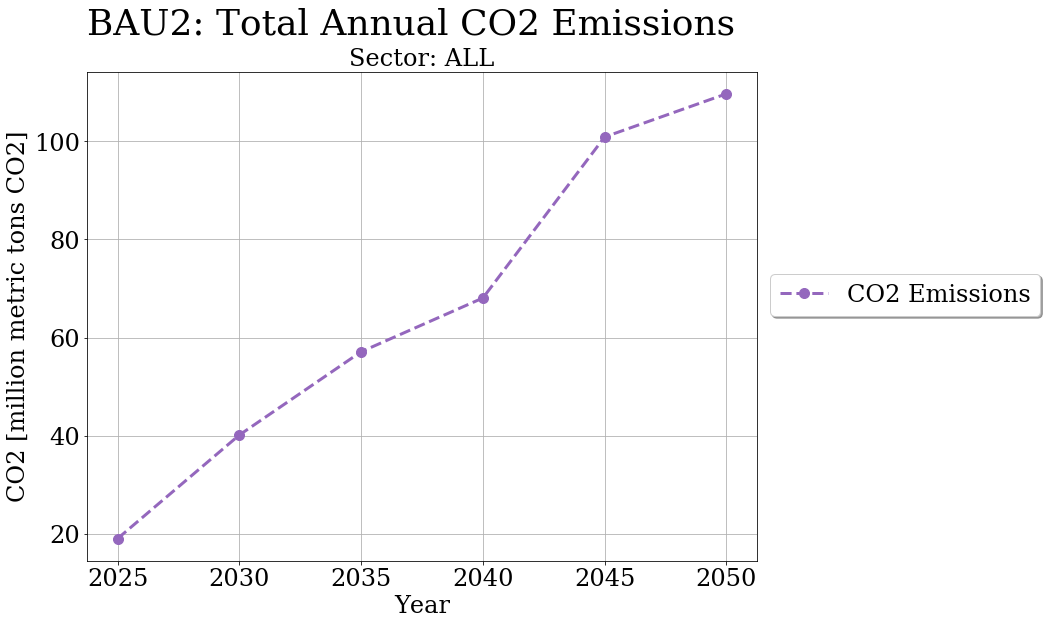

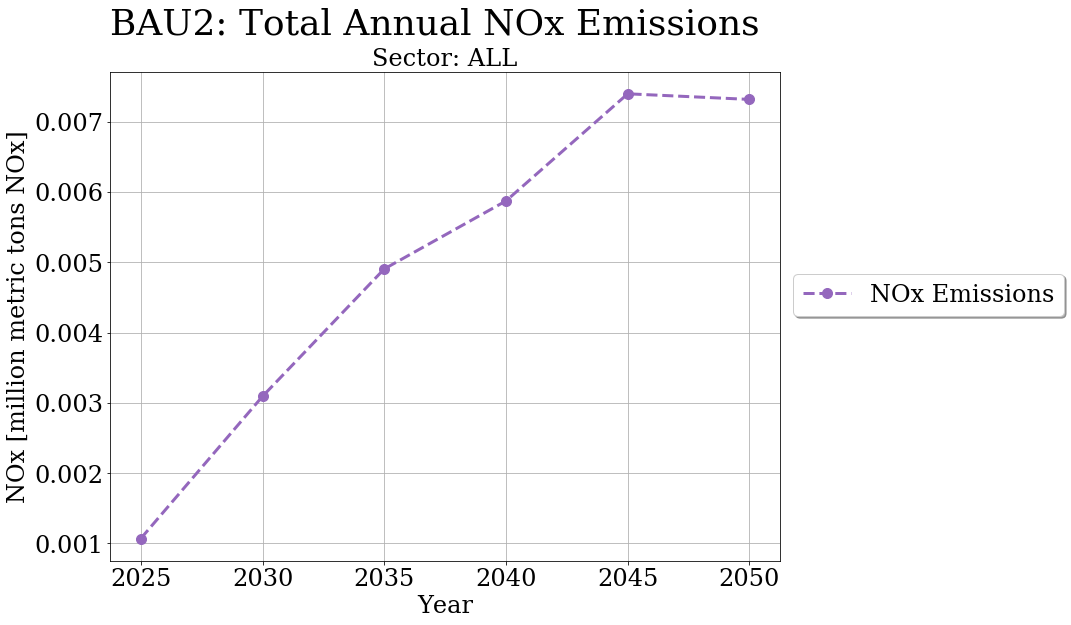

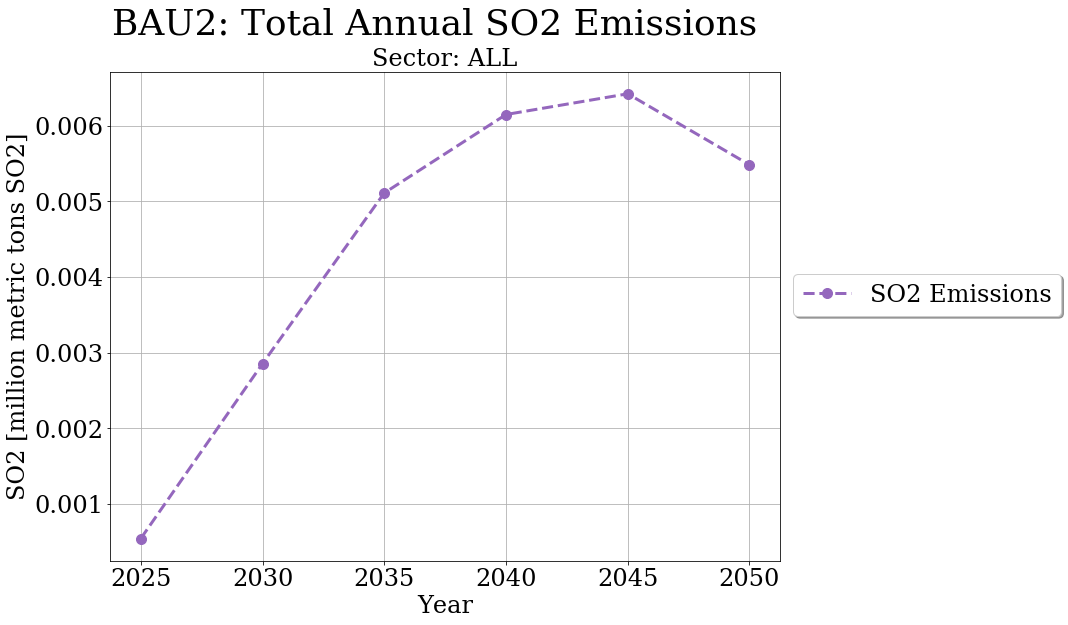

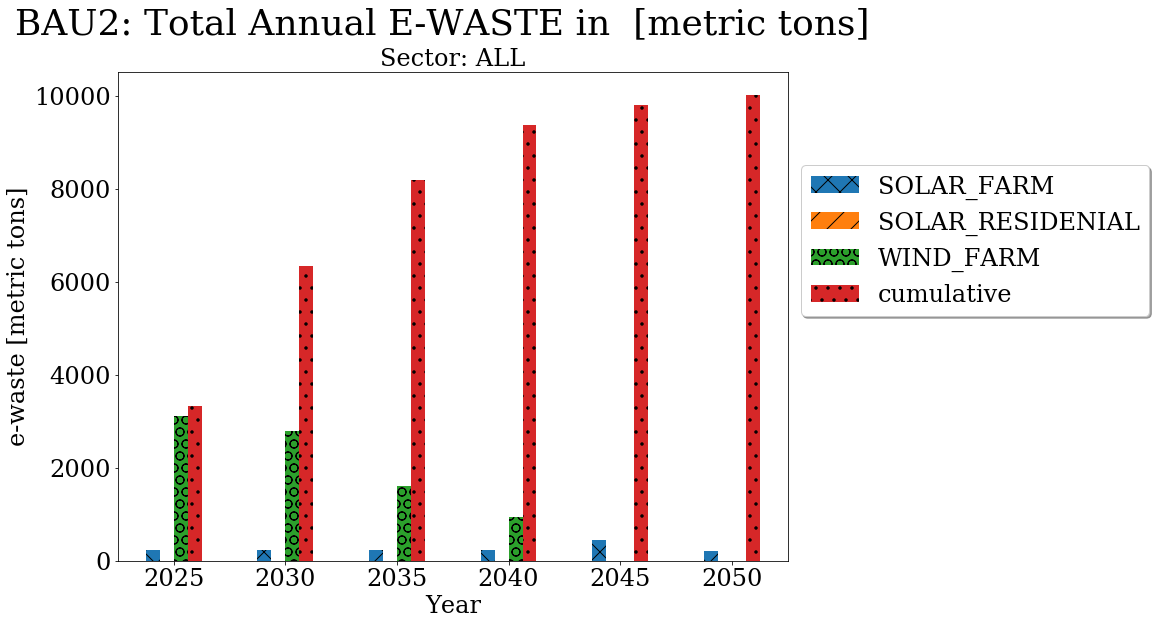

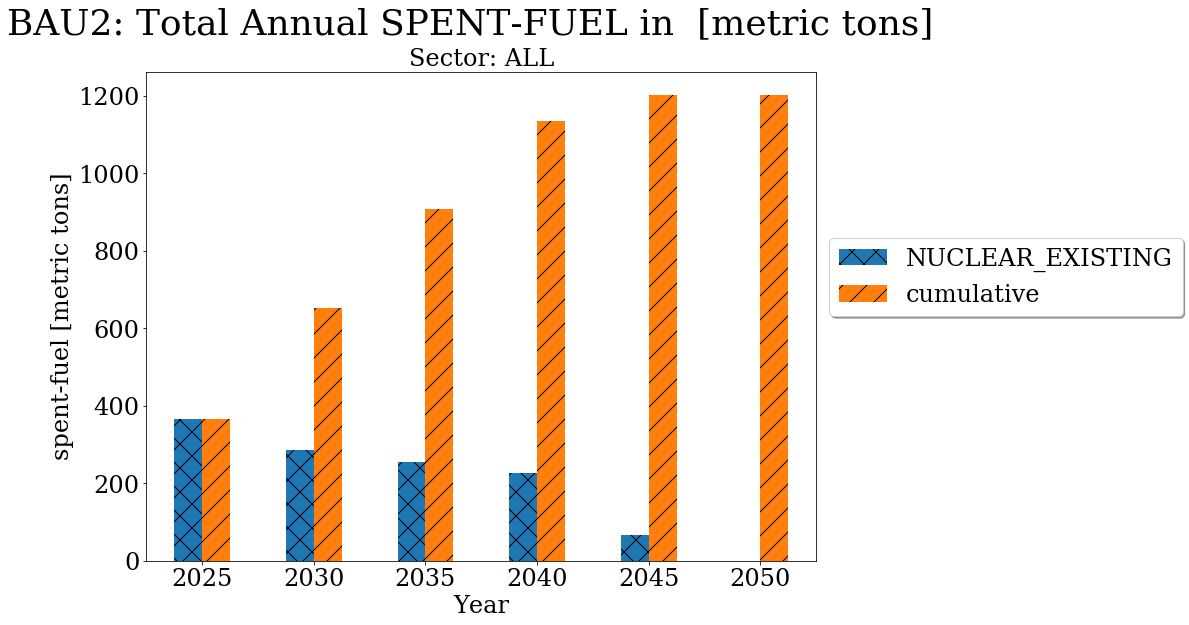

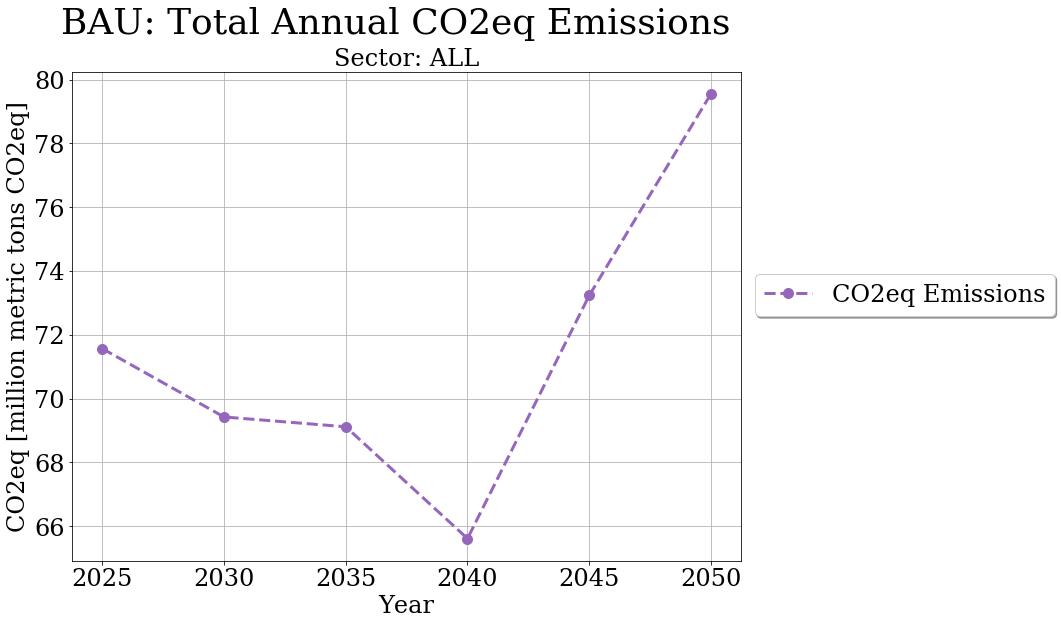

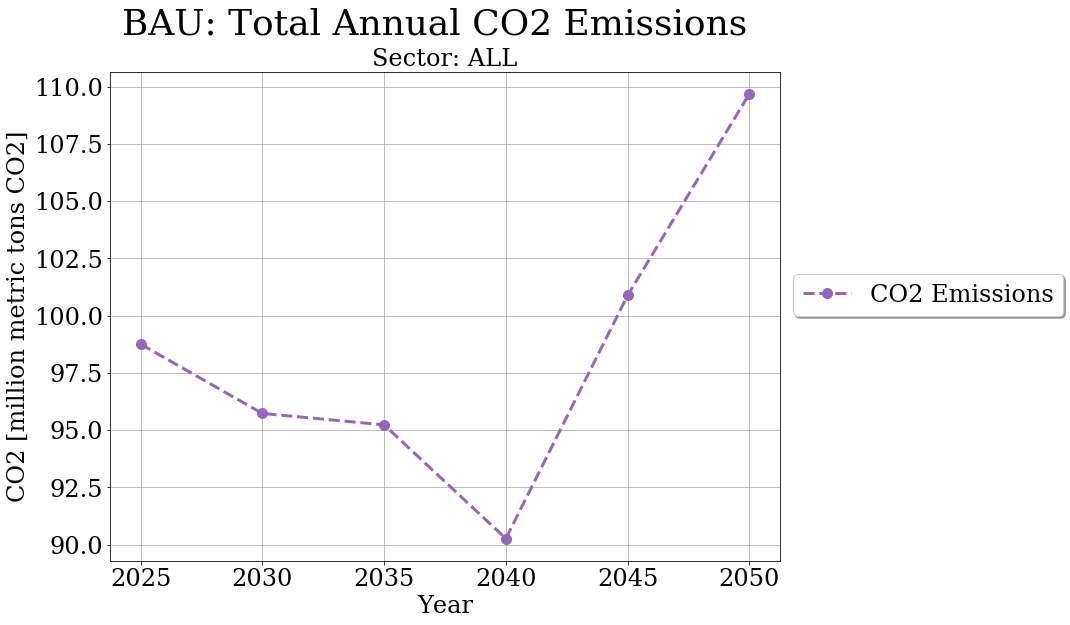

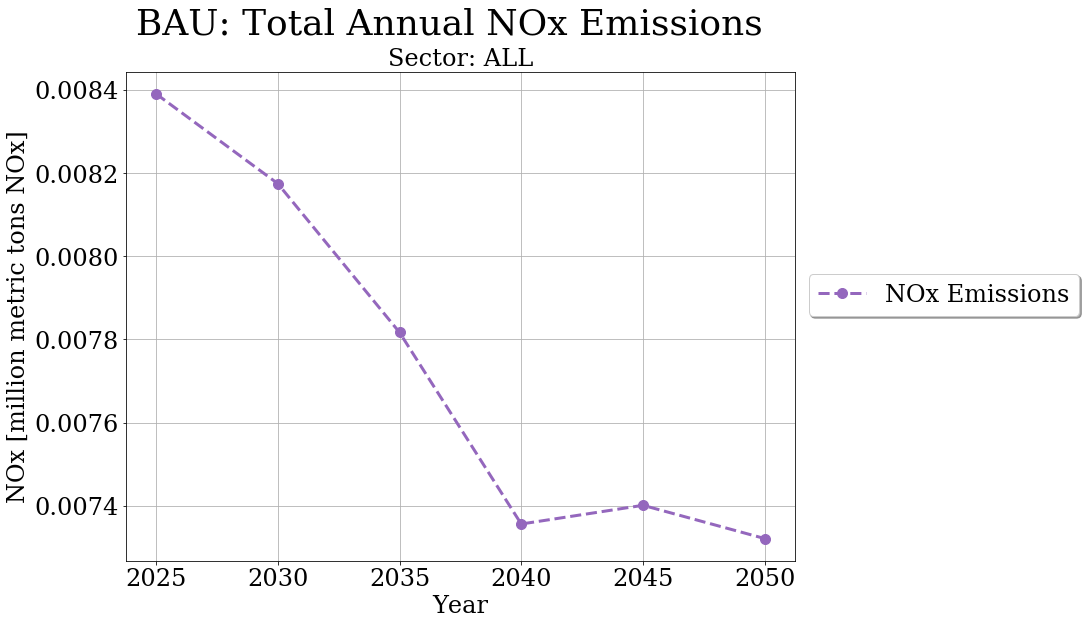

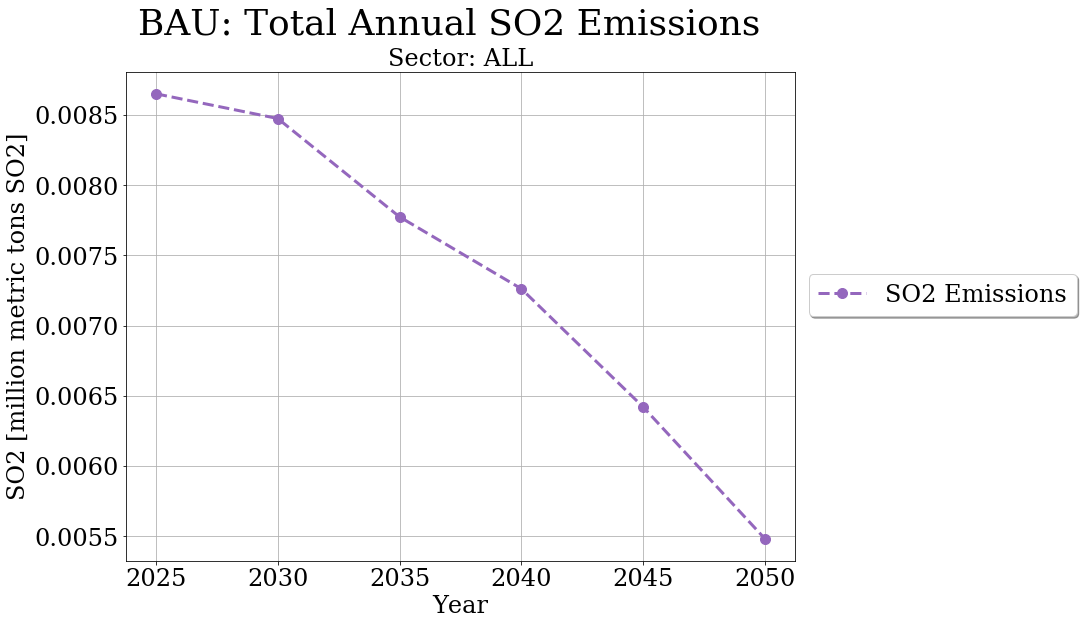

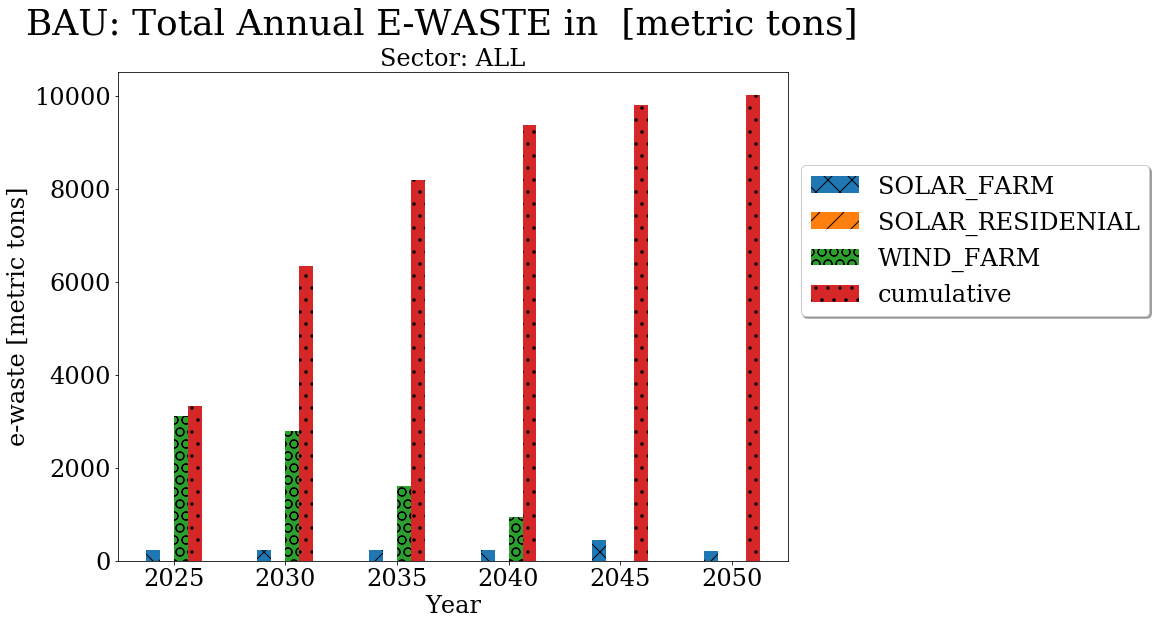

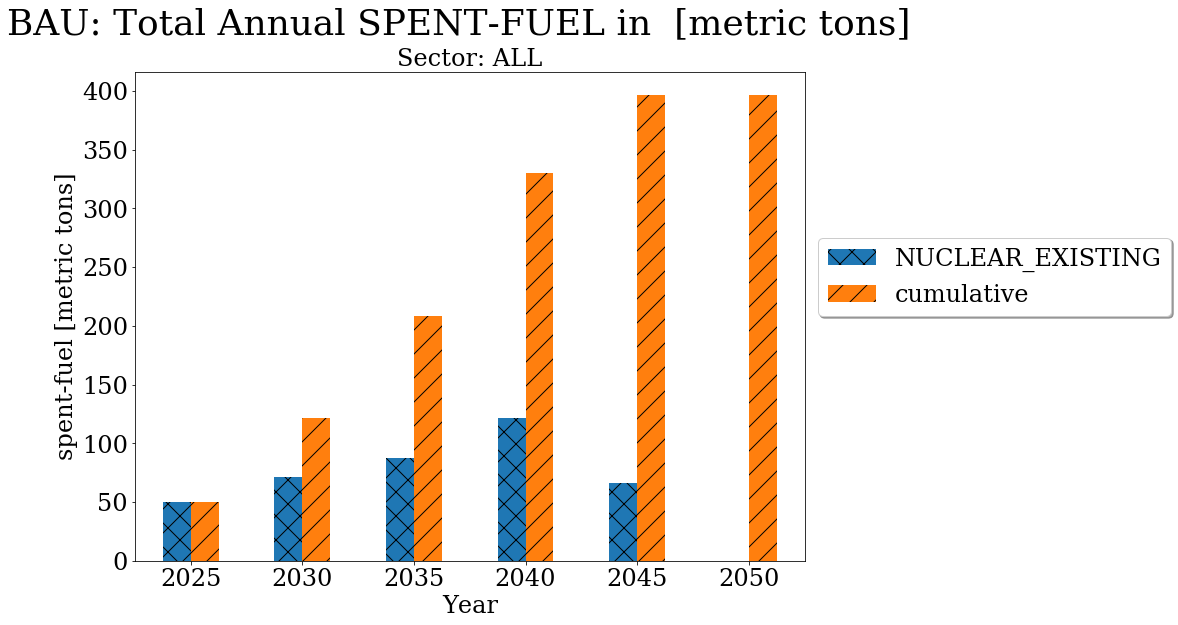

In [3]:
scenario = 'bau'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)        

## Scenario: SD2

* Nuclear Plants Shutdown Prematurely
* There is no constraint on carbon emissions

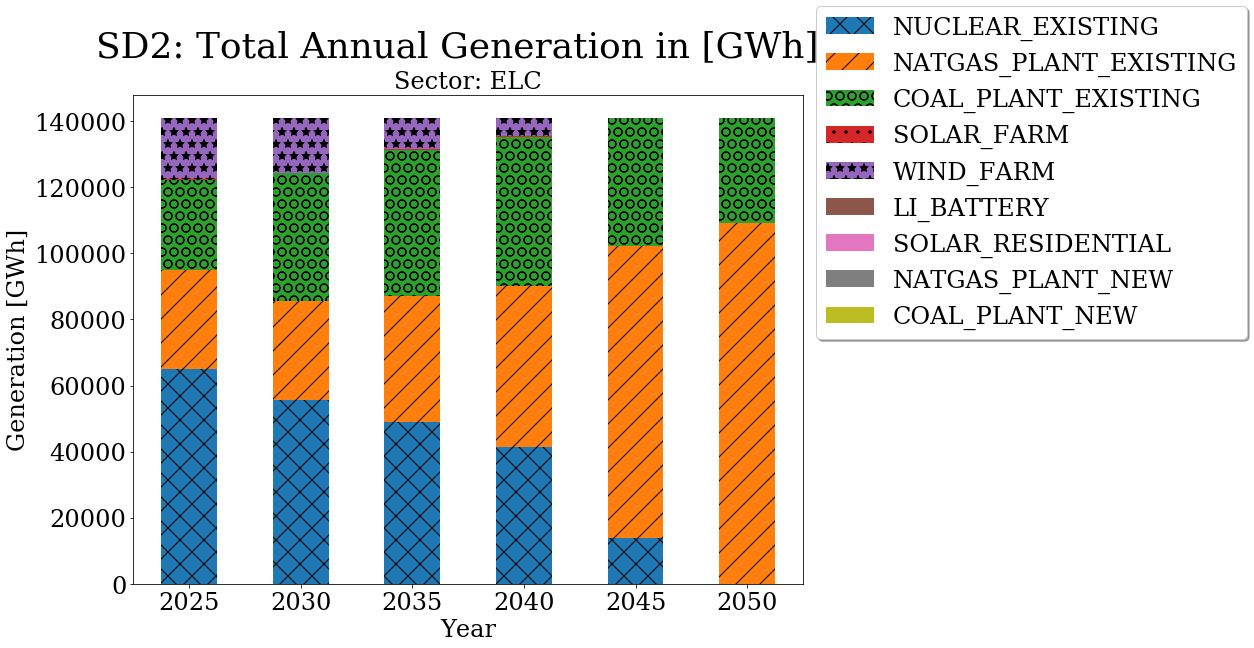

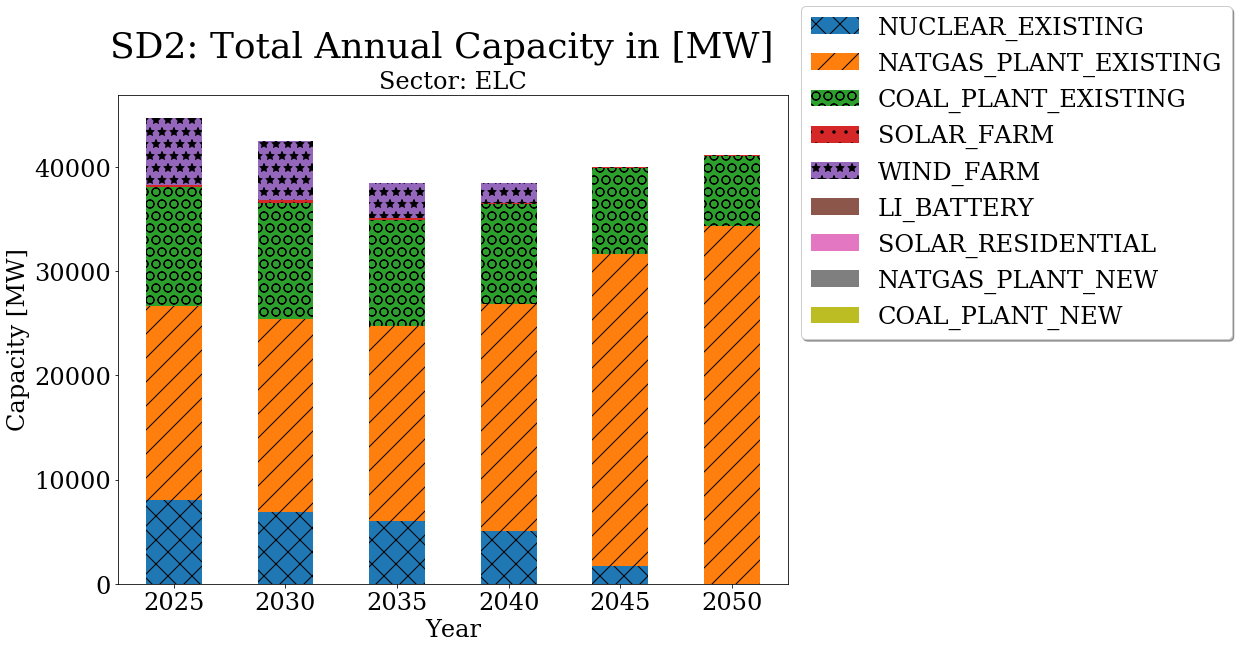

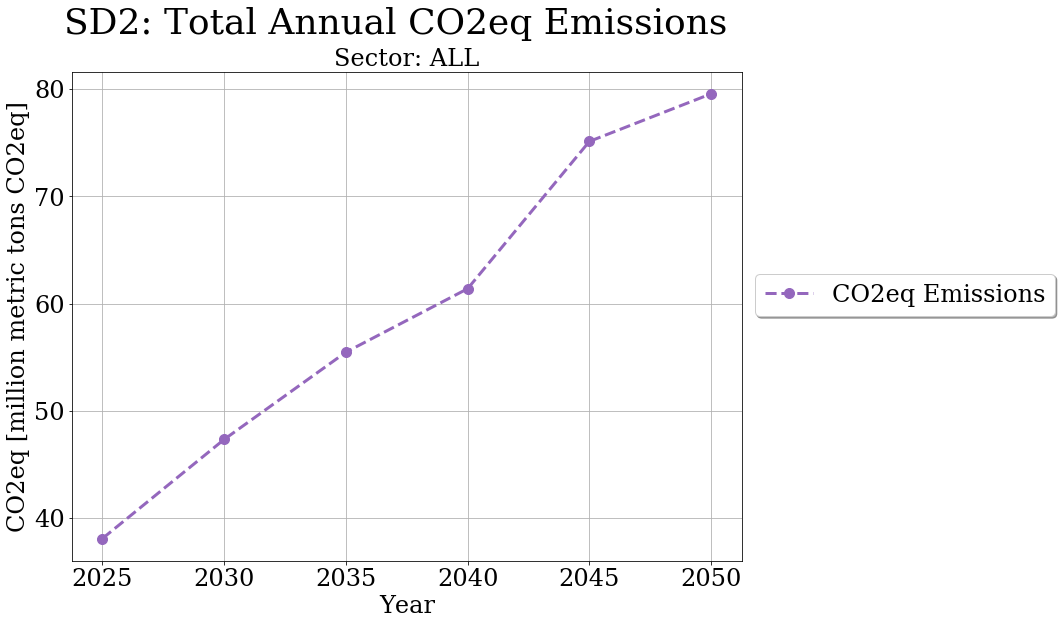

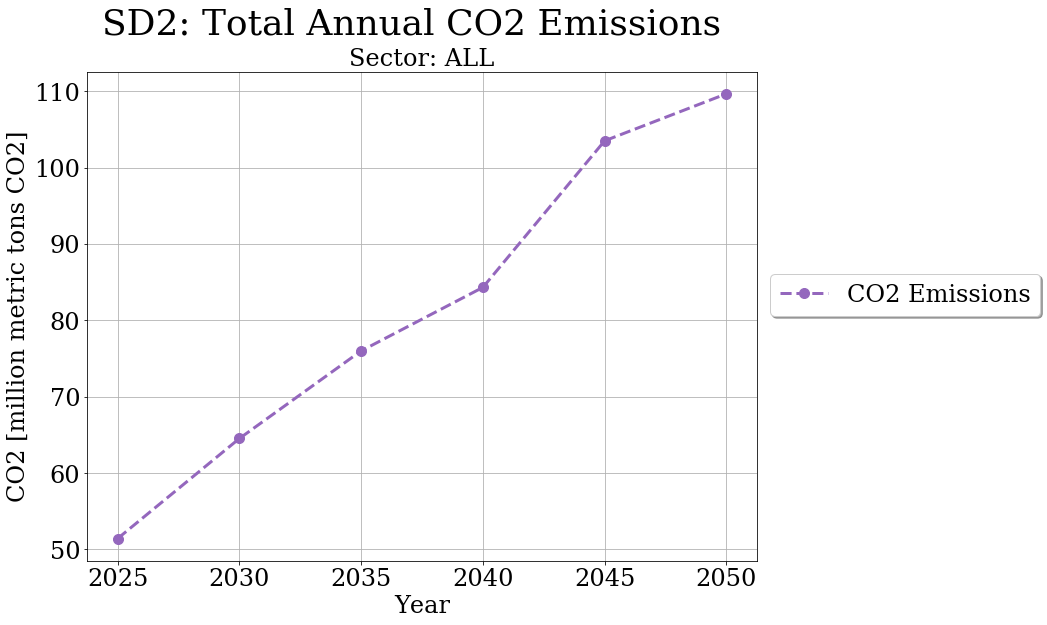

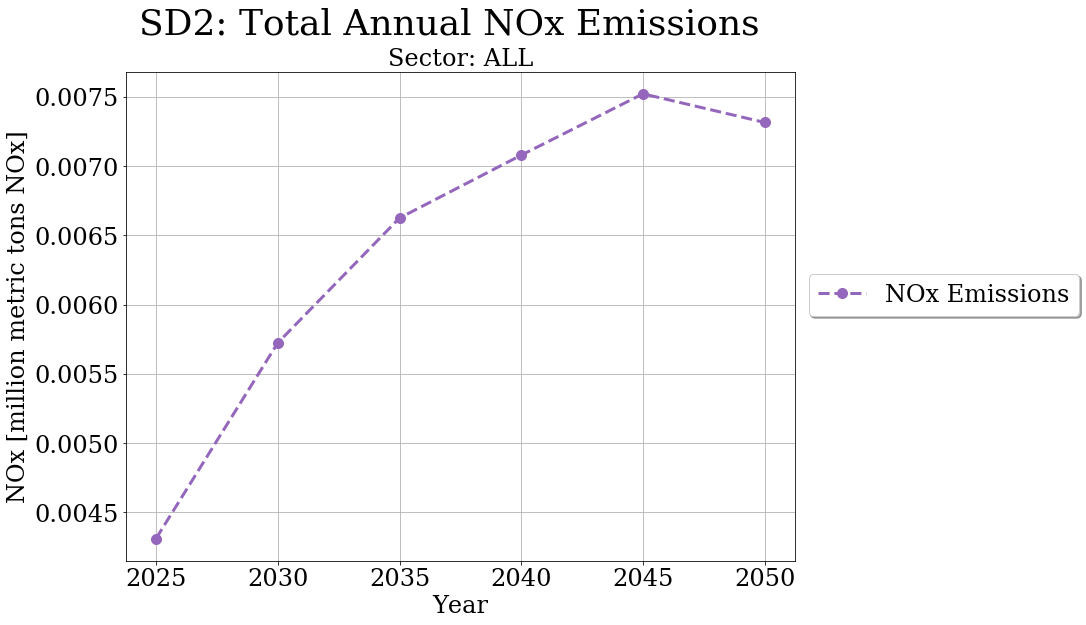

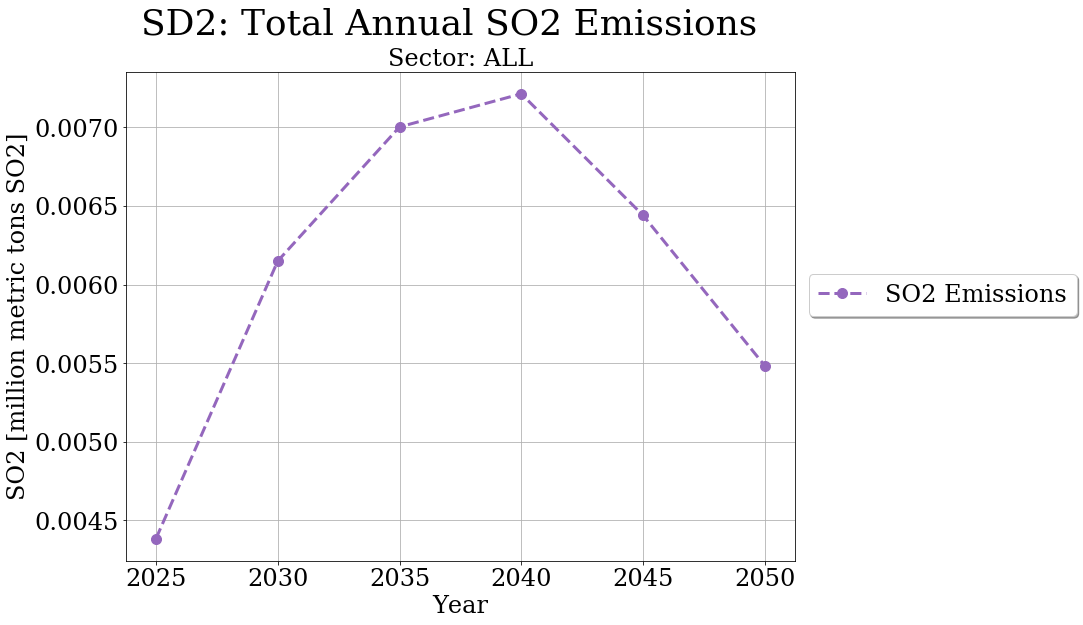

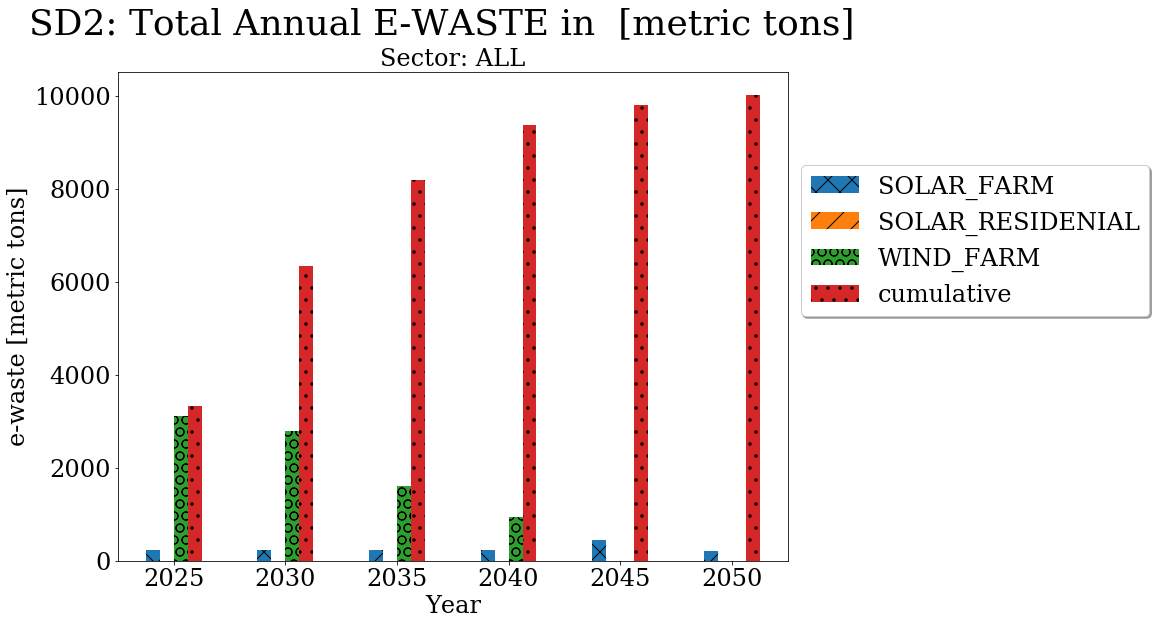

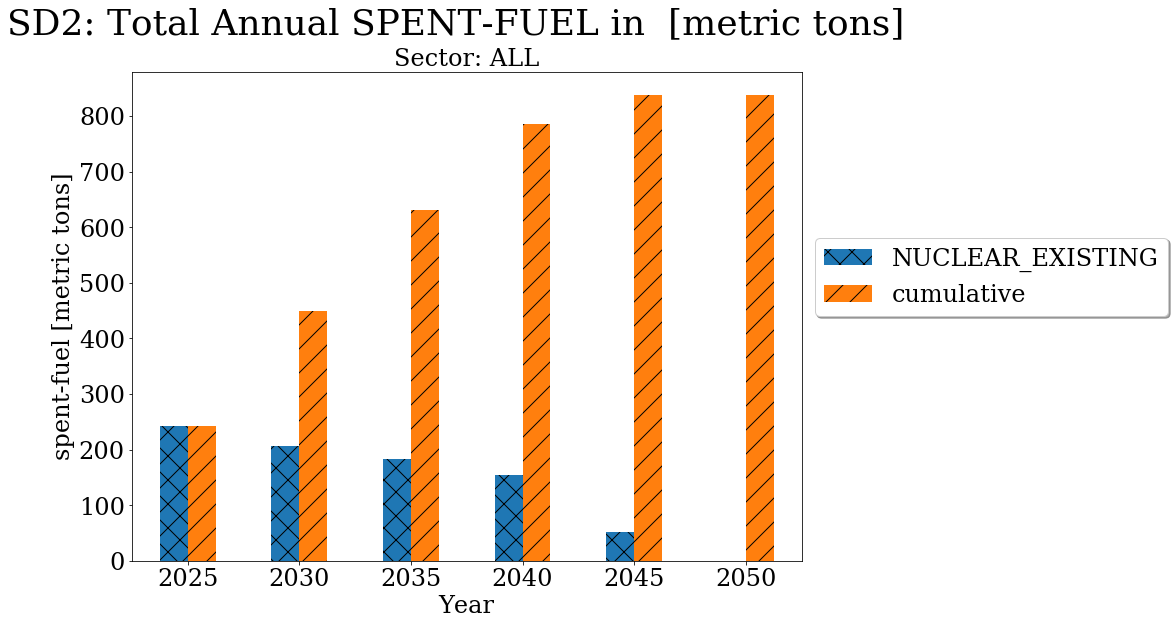

In [4]:
scenario = 'SD2'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD3

* Nuclear plants shutdown prematurely 
* Zero carbon emissions allowed by 2030
* 100% renewable energy by 2050

Objective Function Values: 119265.34401 million dollars

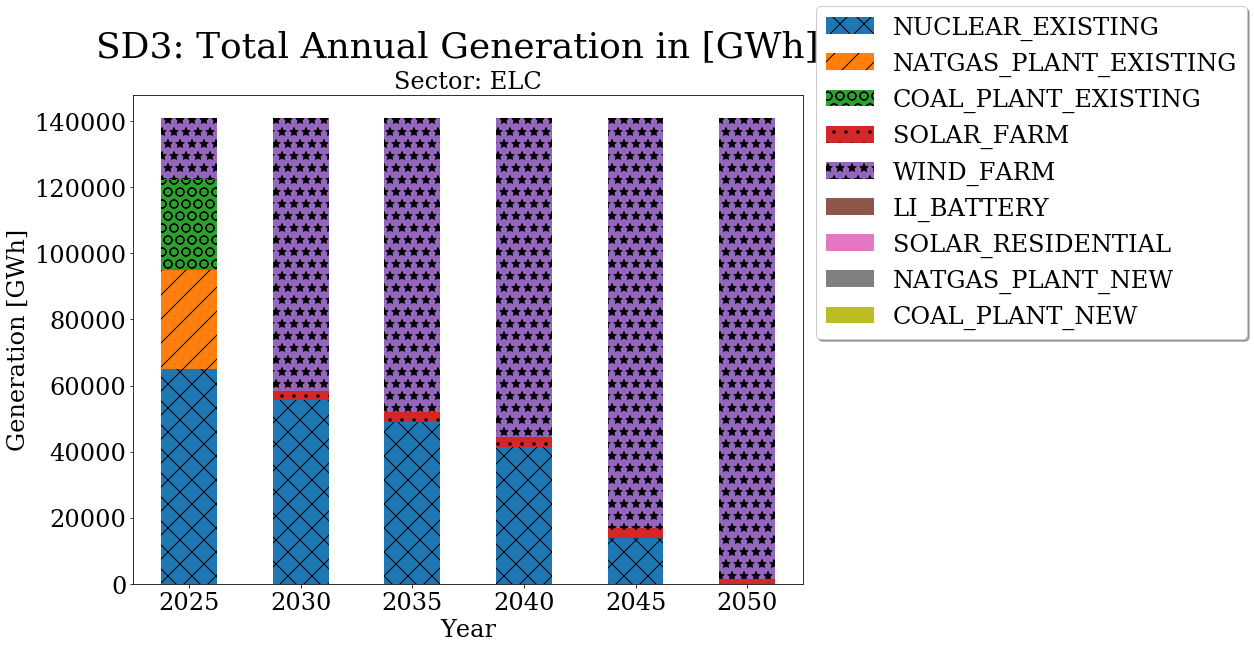

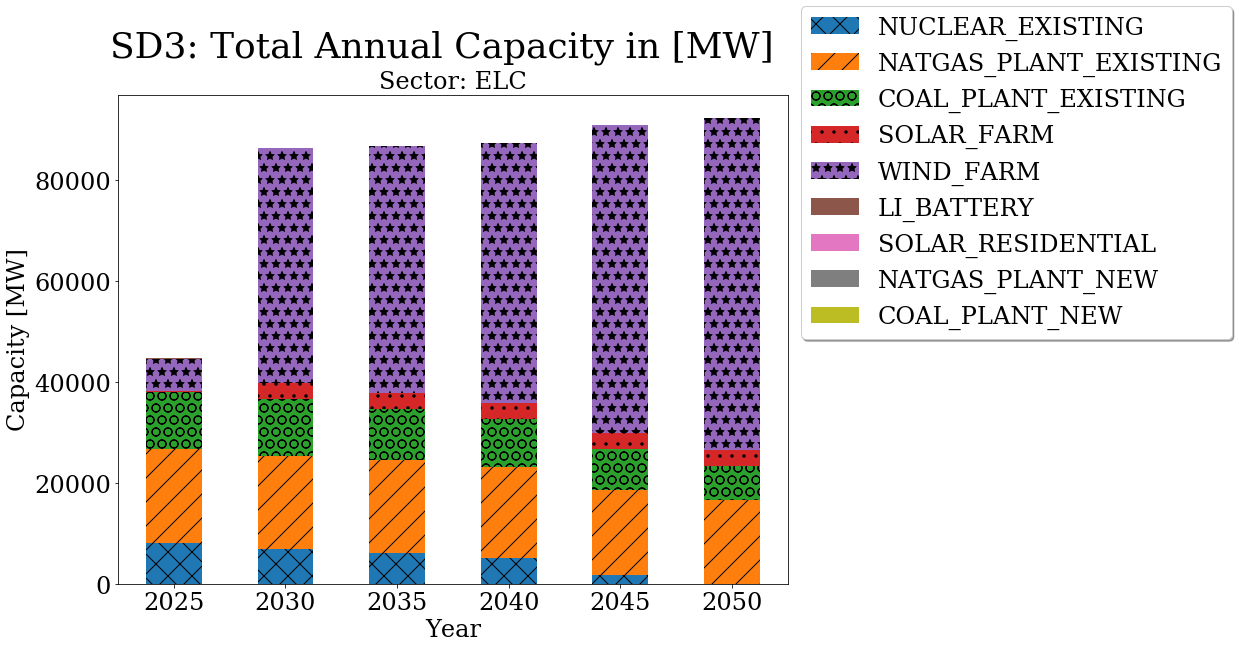

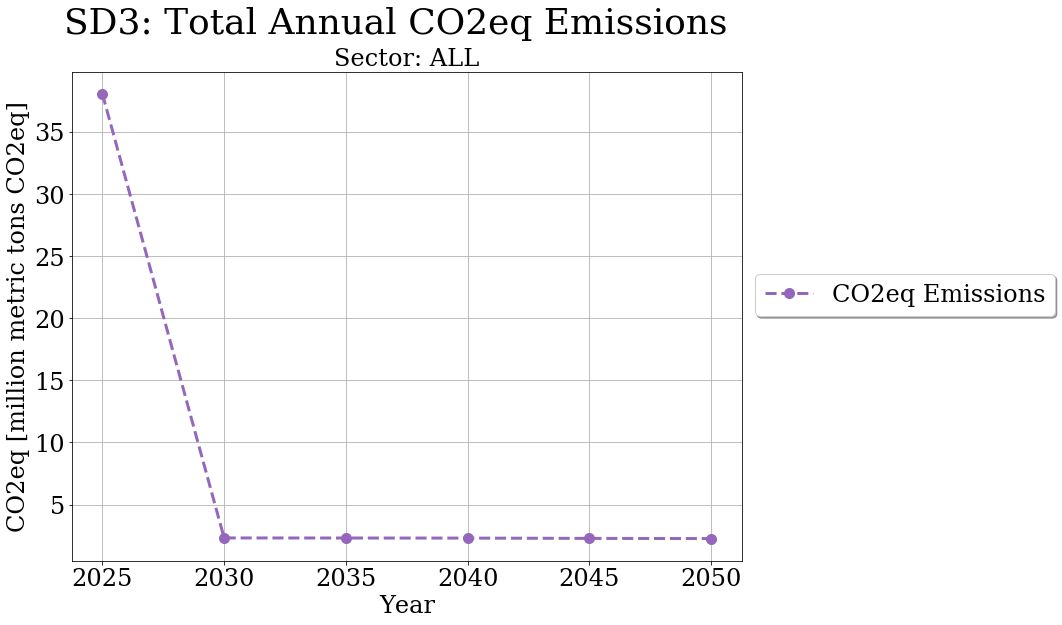

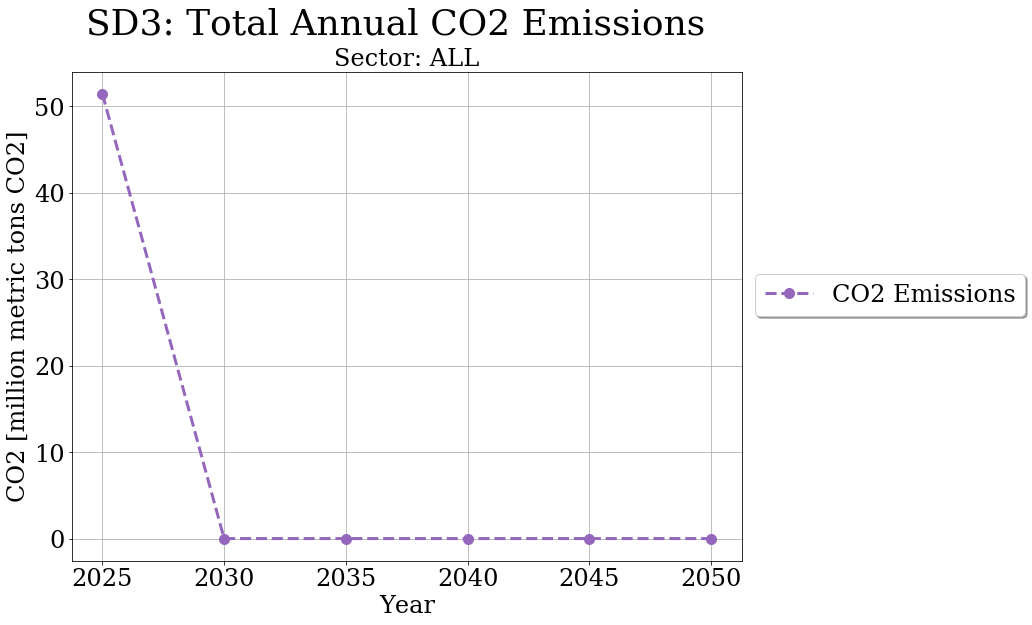

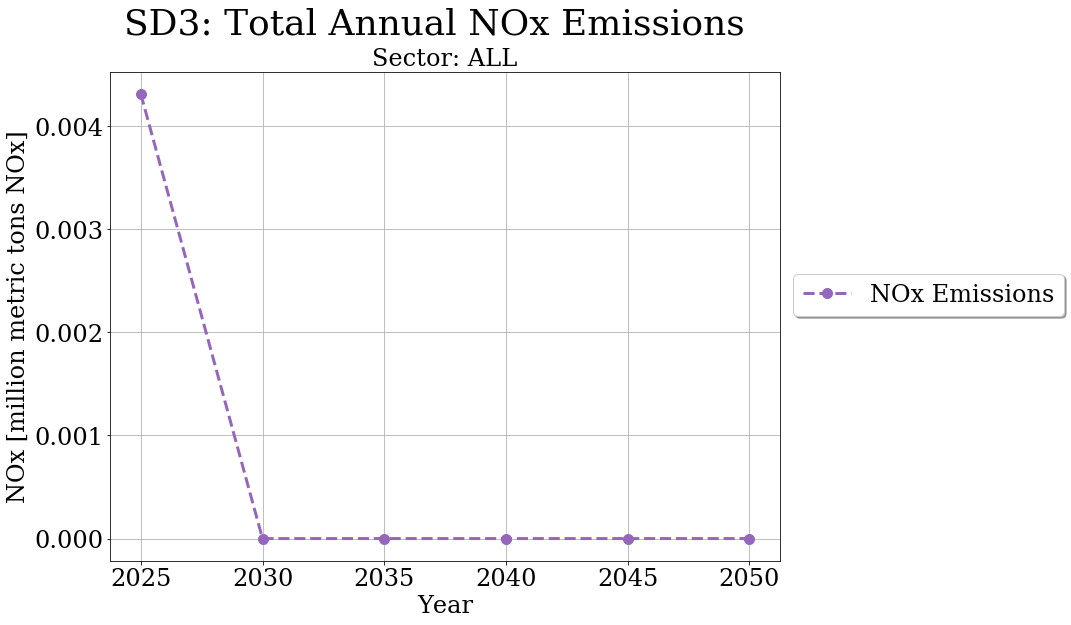

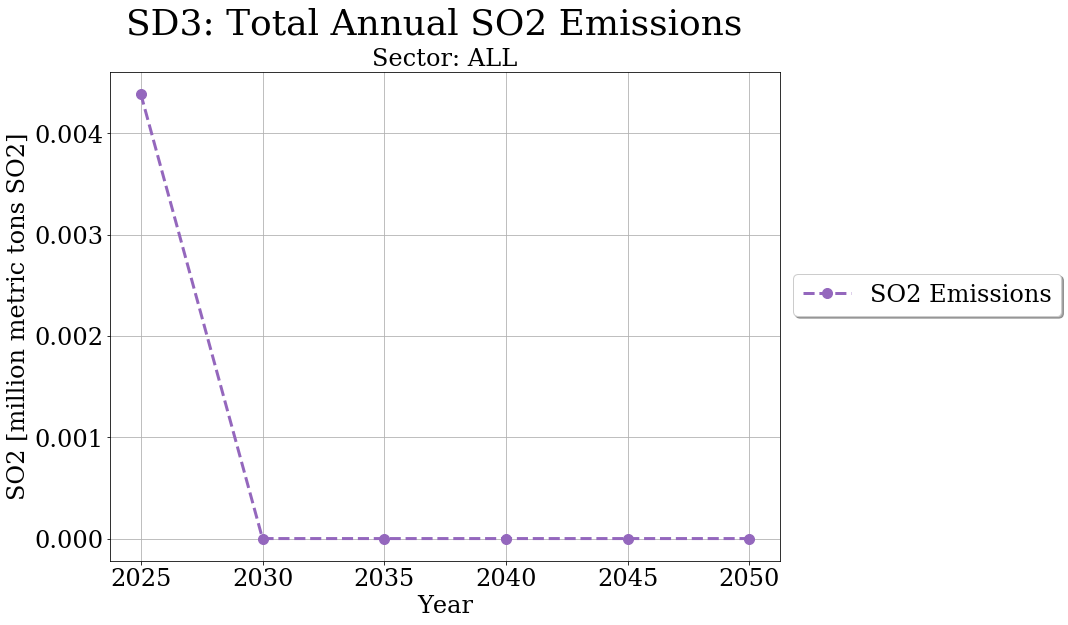

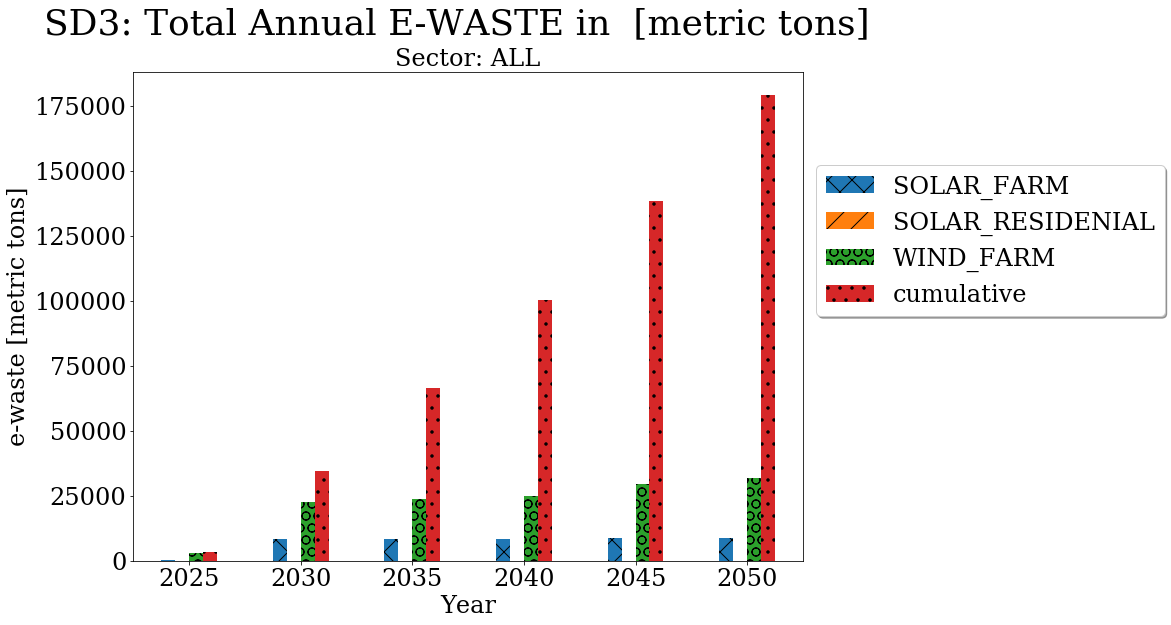

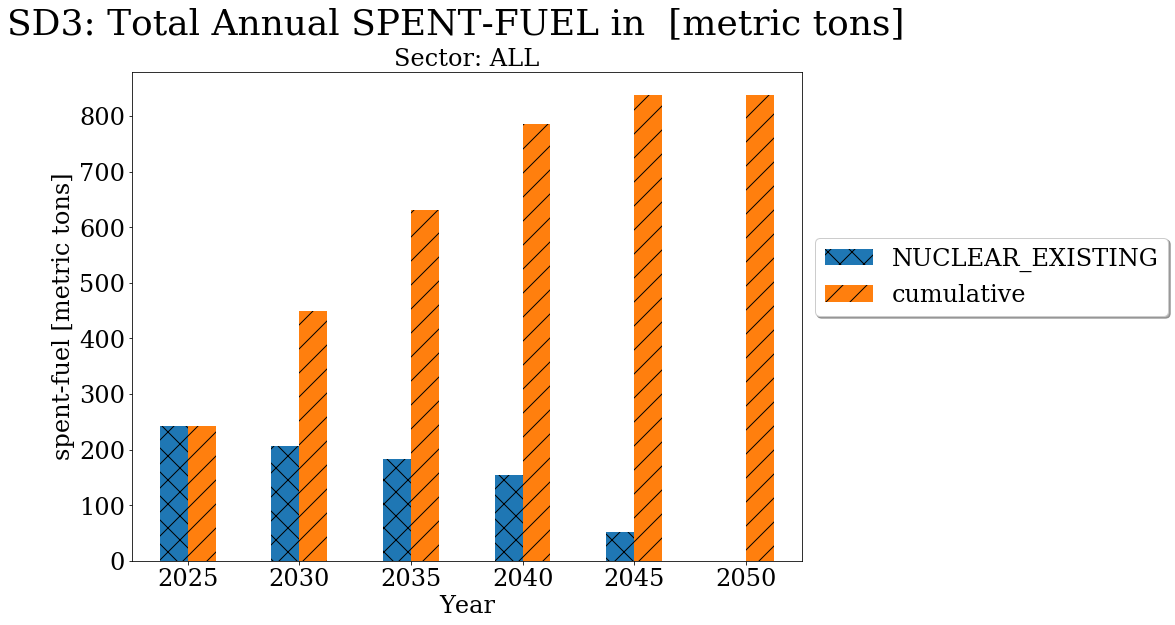

In [5]:
scenario = 'SD3'
scenario_list = [f for f in file_list if scenario in f]
make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False)  

## Scenario: SD4

* Nuclear is constrained by it's current maximum capacity. All plants could stay open. 
* Zero carbon emissions allowed by 2030

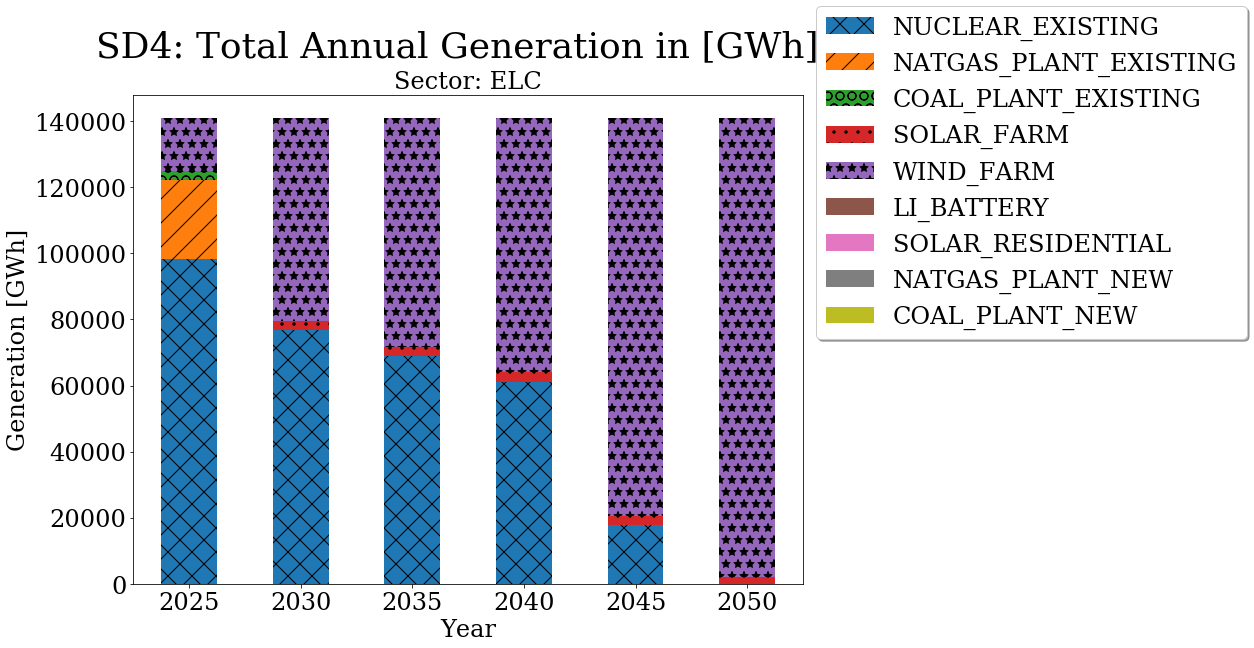

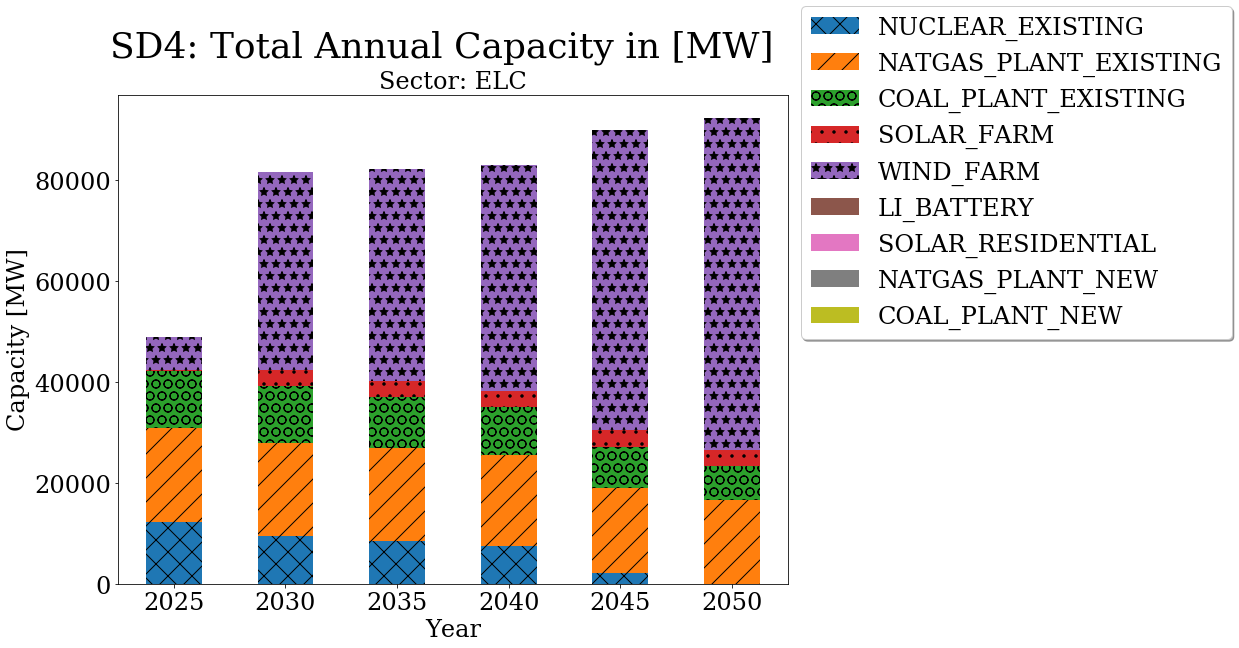

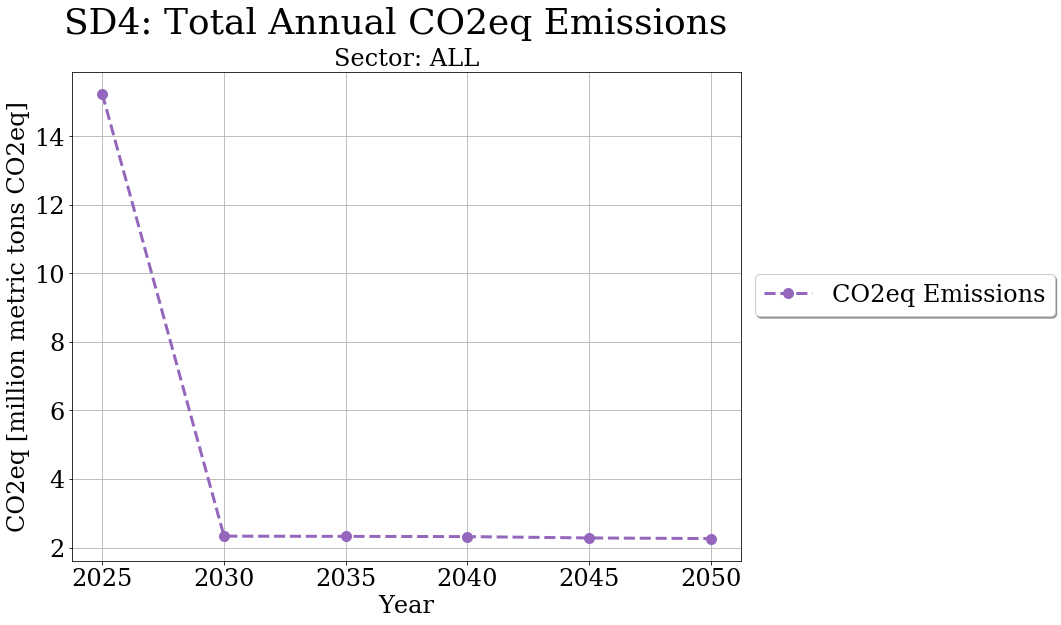

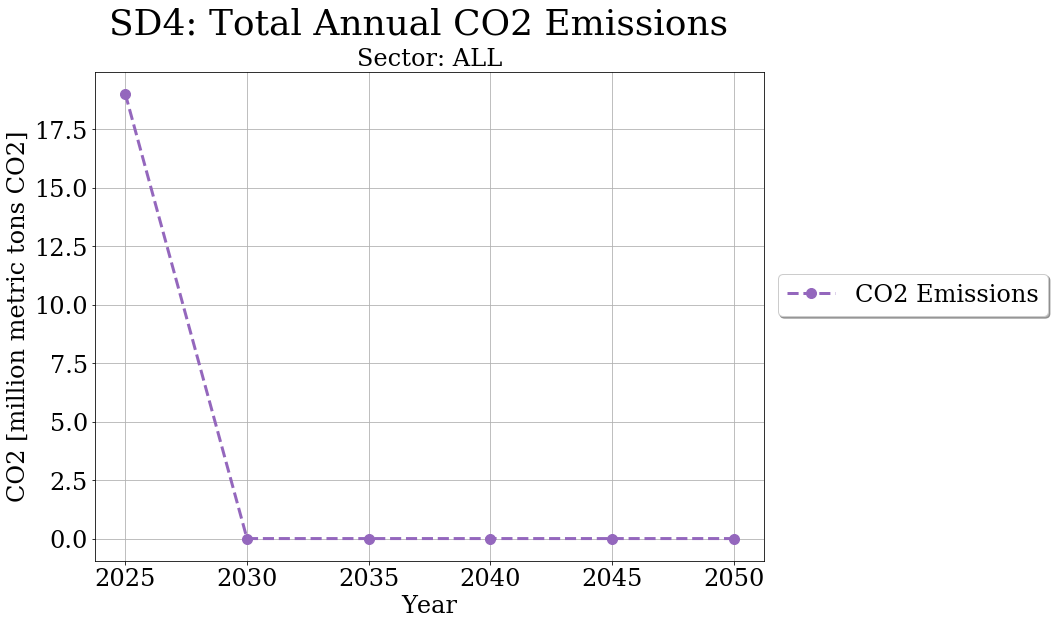

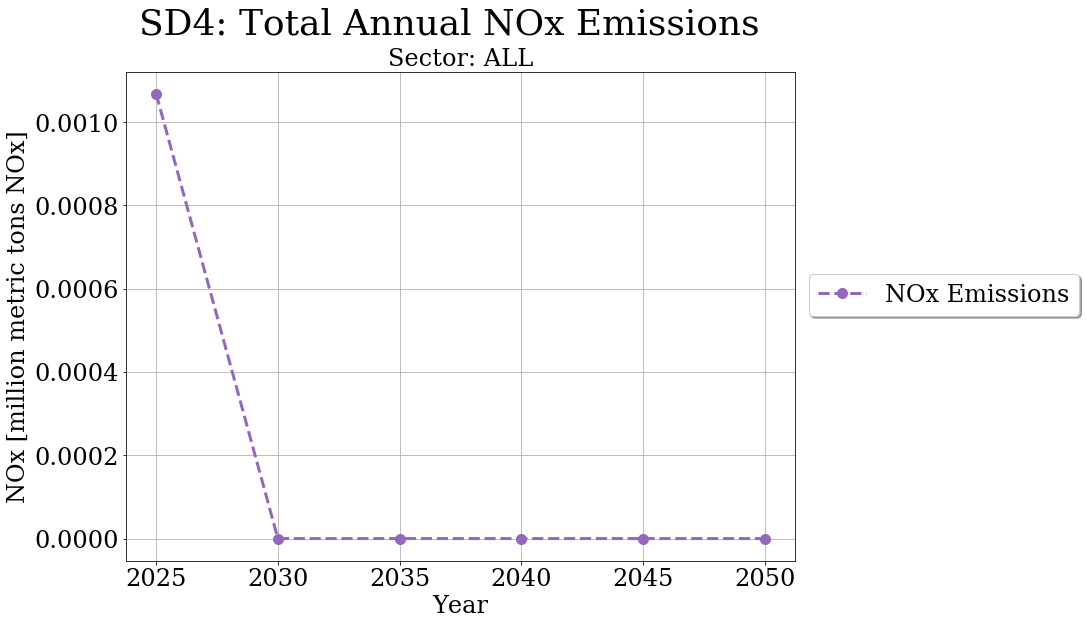

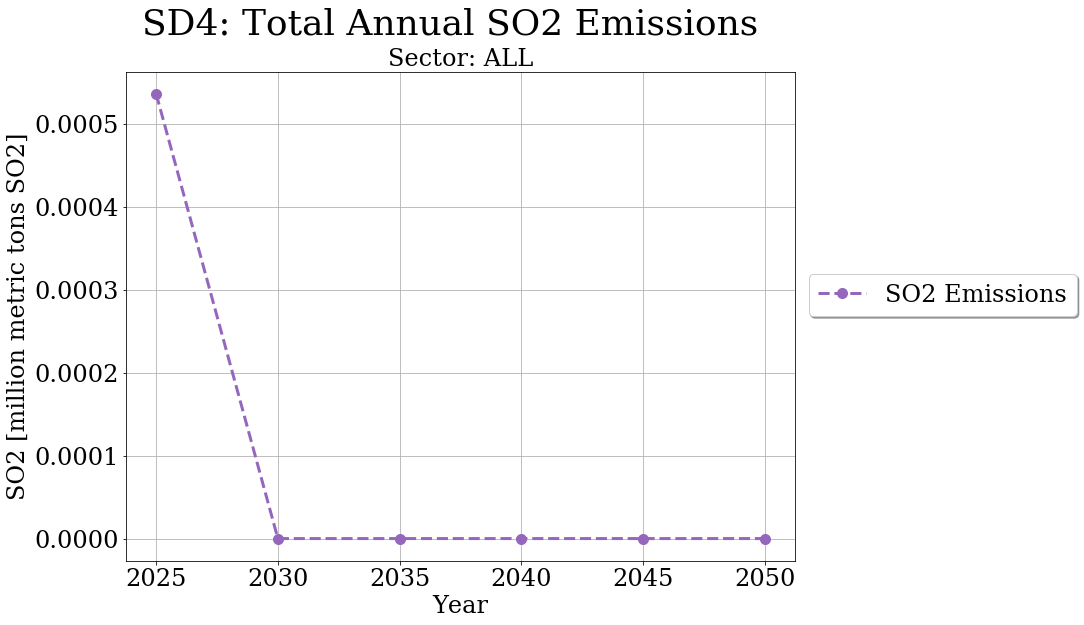

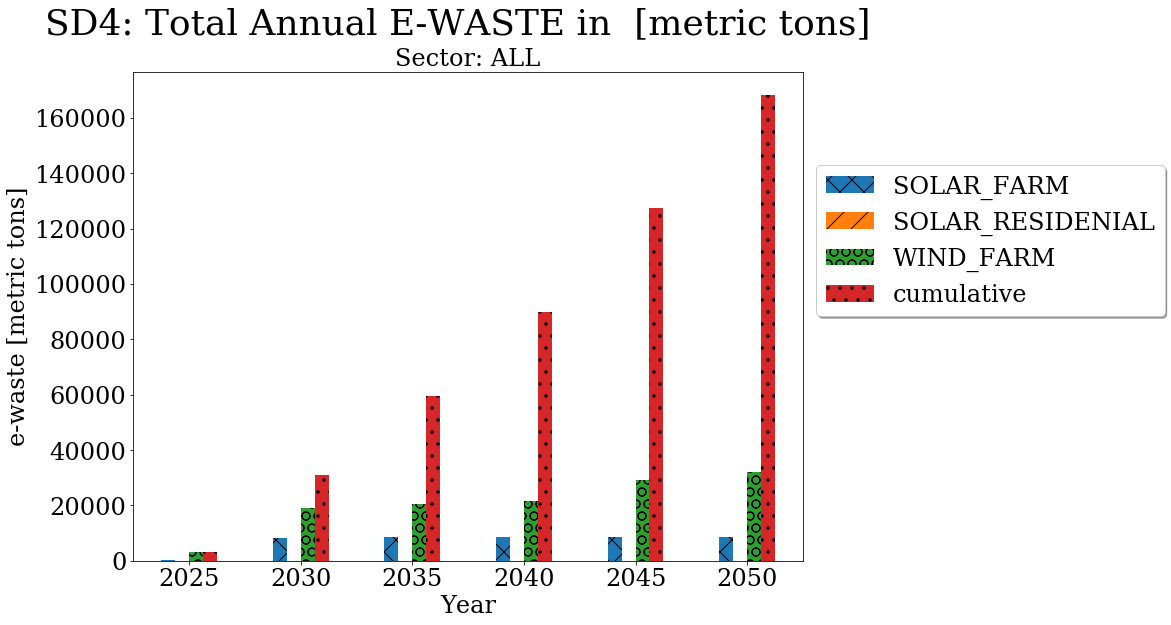

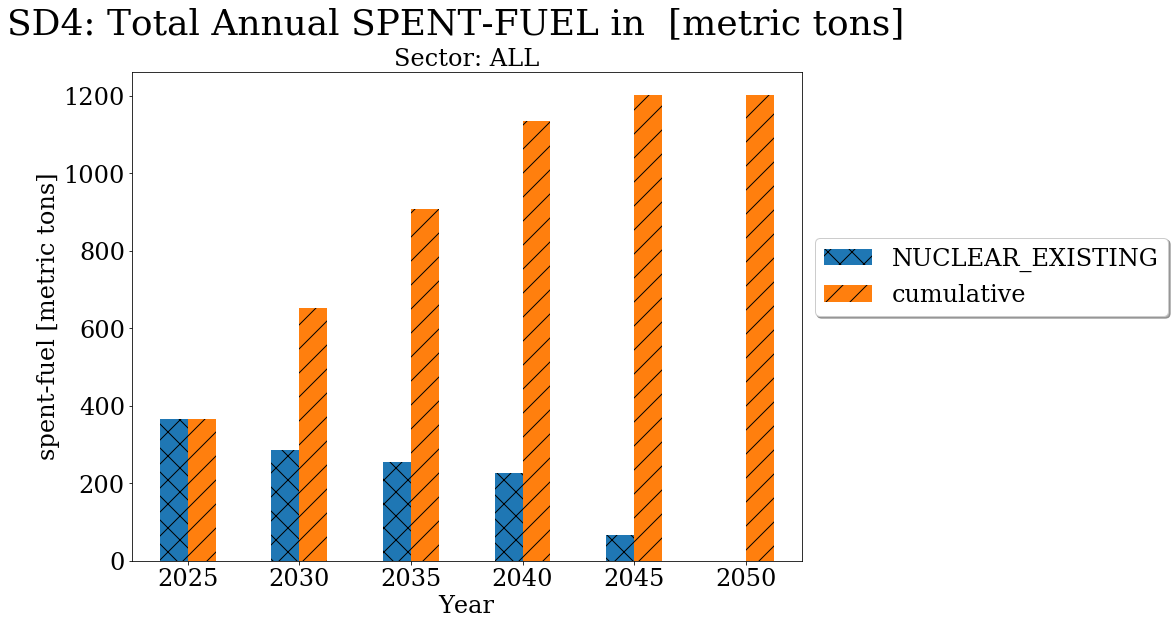

In [6]:
scenario = 'SD4'
scenario_list = [f for f in file_list if scenario in f]
sd4_dfs = make_capacity_plots(scenario_list, to_save=False)
make_emissions_plots(scenario_list, to_save=False) 

In [7]:
def get_objective_value(file_list, scenarios=None):
    """
    This function retrieves the total cost objective functions
    for every scenario in the list of scenarios provided.

    Parameters
    ----------
    file_list : list
        The list of files with solution data.
    
    scenarios : list
        The list of scenarios considered.
        If None is given, all available log files will 
        be used.
        
    Returns
    -------
    objective_df : pandas dataframe
        A dataframe with all objectives.
    """
    
    # set up dictionary of scenarios
    objective_dict = {}

    for file in file_list: 
        datalines = parse_datalines(file)
        stop_at_line = 'Objective function value'
        scenario = get_scenario_name(file)
        objective_dict[scenario] = []
        for line in datalines:
            if stop_at_line in line:
                value_str = line.split()
                objective_dict[scenario].append(round(float(value_str[-1].strip("\'")),3))
                continue
    
    objective_df = pd.DataFrame(objective_dict)
    
    return objective_df

In [8]:
objectives = get_objective_value(file_list)
objectives

,bau2,bau,SD2,SD3,SD4
0,3.663508e+07,20021639.14,2.921200e+07,5.157302e+07,6.733610e+07


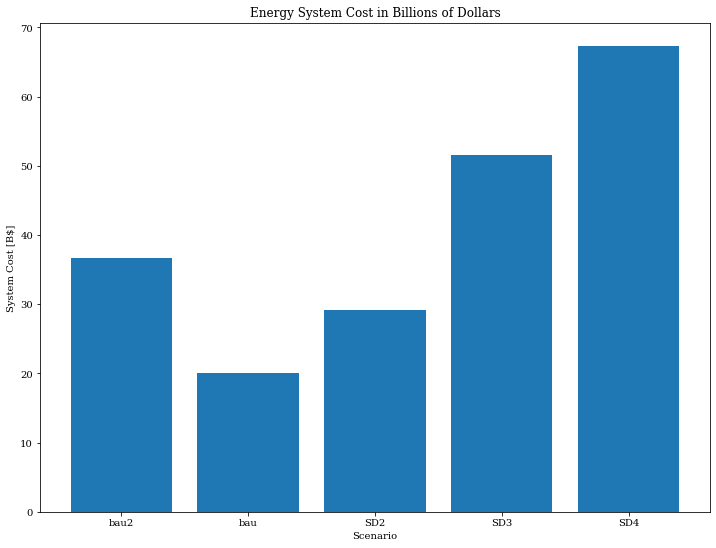

In [9]:
y = objectives.values.flatten()/1e6
x = np.array(objectives.keys())
plt.ylabel("System Cost [B$]")
plt.xlabel("Scenario")
plt.title("Energy System Cost in Billions of Dollars")
plt.bar(x, np.array(y))
plt.show()